<a href="https://colab.research.google.com/github/Deven876/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

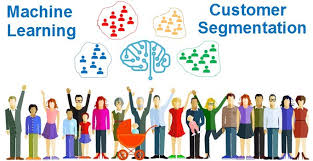

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# Architecture

Data Preparation and Exploratory Data Analysis > Build Model using Multiple Techniques/Algorithms > Optimal Model identified through Testing and Evaluation

# Importing

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from numpy import math
%matplotlib inline


In [46]:
# importing dataset 
file='/content/drive/MyDrive/capstone 4 customer segmentation/Online Retail.xlsx'
data1=pd.read_excel(file)
data=data1.copy()

# **Data Inspection**

In [ ]:
# First Look
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Shape of dataset
shape=data.shape
print('Number of rows: ',shape[0])
print('Number of Columns: ',shape[1])


Number of rows:  541909
Number of Columns:  8


In [ ]:
## Dataset Information(Dtype ,Null count, Non-null count)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Descriptive summary of dataset
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- The max and min value of Quantity are both 80995; it could represent a reversal of data entry.
- Negative UnitPrice It is uncommon to have negative UnitPrice, as this would mean a cash outflow to a company. 

In [ ]:
# Looking for missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- Missing 25% of CustomerID.
- Missing 0.3% of descriptions.

In [ ]:
def show_missing():
    missing = data.columns[data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data[show_missing()].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


In [ ]:
# Looking for Unique Values
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

# Handling Missing Values

In [47]:
# Dropping missing values
data=data[pd.notnull(data['CustomerID'])]
data=data[pd.notnull(data['Description'])]
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data=data[~data['InvoiceNo'].str.contains('C')]

In [48]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# **Eda and Data Preprocessing**

### 1. **Stockcode**

In [51]:
Stockcode_data=data['StockCode'].value_counts().reset_index()
Stockcode_data.rename(columns={'index': 'StockCode_Name'}, inplace=True)
Stockcode_data.rename(columns={'StockCode': 'Count'}, inplace=True)
Stockcode_data.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


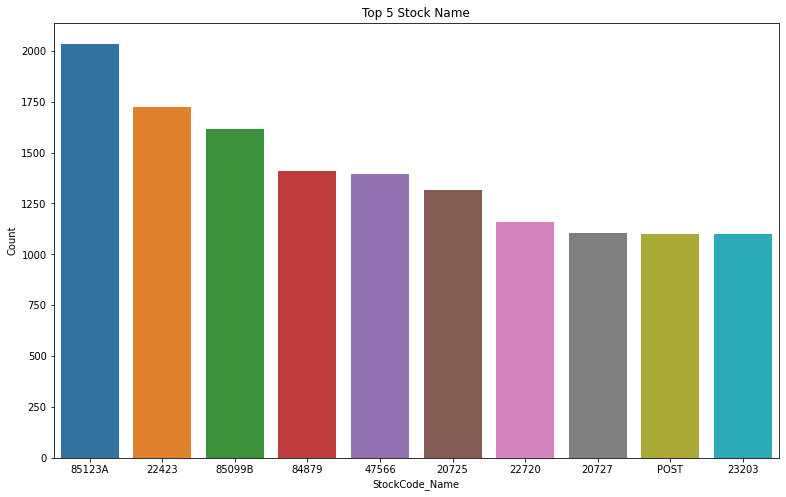

In [52]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stockcode_data[:10])

### 2.**Invoice Date**

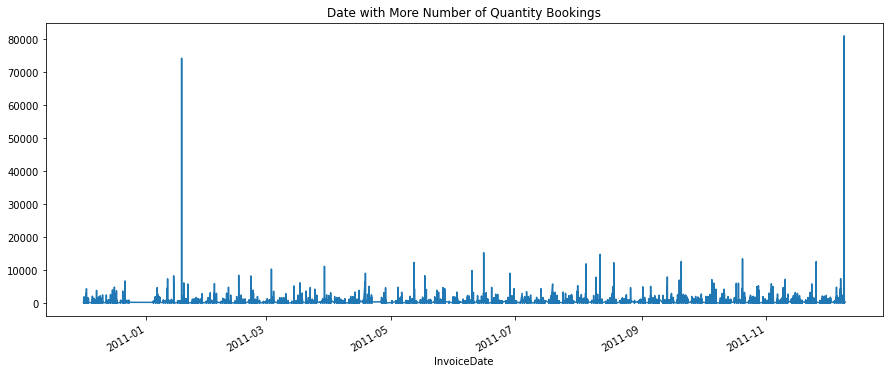

In [53]:
data.groupby('InvoiceDate')['Quantity'].sum().plot.line(figsize=(15,6))
plt.title('Date with More Number of Quantity Bookings')
plt.show()

### 3.**Country**